In [4]:
import numpy as np
from scipy.optimize import leastsq, minimize_scalar
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline

In [5]:
a = 0.5
b = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0 = 0
tf = 25

In [6]:
def dsdt(t, s):
    return (-1 * a) * s


susceptible = solve_ivp(dsdt, (t0, tf), [S0], dense_output=True)


def didt(t, i):
    return a * susceptible.sol(t) - b * i


infected = solve_ivp(didt, (t0, tf), [I0], dense_output=True)


def drdt(t, _):
    return b * infected.sol(t)


recovered = solve_ivp(drdt, (t0, tf), [R0], dense_output = True)

In [7]:
def s_t(t,s0,a):
    return S0 * np.exp(-a * t)


def diff_st(params, y, t):
    return S0 * np.exp(-a * t)


parameters_1 = (a, S0)
st = leastsq(diff_st, parameters_1, args=(susceptible.y[0], susceptible.t))
st[0]

array([5.0e-01, 9.9e+05])

In [8]:
def i_t(t,I0,S0,a):
    return (I0 + a * S0 * t) * np.exp(-a * t)


def diff_it(p,y,t):
    a, S0, I0  = p
    return infected.y[0] - i_t(t, I0 ,S0 ,a)


parameters_2 = (a, S0, I0)
it = leastsq(diff_it, parameters_2, args=(infected.y[0], infected.t))
it[0]

array([3.83762944e-01, 1.25281252e+06, 8.08519967e+03])

In [9]:
def r_t(t,S0,I0,a,N):
    return N - s_t(t,S0,a) - i_t(t,I0,S0,a)


def diff_rt(p,y,t):
    a,S0,I0,R0  = p
    return recovered.y[0] - r_t(t,S0,I0,a,N)


parameters_3 = (a,S0,I0,R0)
rt = leastsq(diff_rt, parameters_3 , args=(recovered.y[0], recovered.t))
rt[0]

array([3.72578636e-01, 9.65947231e+05, 7.92292167e+03, 3.00000000e+03])

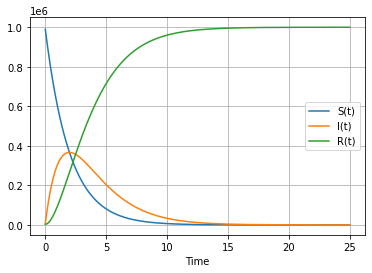

In [10]:
t = np.linspace(t0,tf,N)
y_p = s_t(t,S0,a)
yi_p =  i_t(t,I0,S0,a)
yr_p = N - y_p -  yi_p
plt.plot(t, y_p, label = 'S(t)')
plt.plot(t, yi_p, label = 'I(t)')
plt.plot(t, yr_p, label = 'R(t)')
plt.legend()
plt.xlabel("Time")
plt.grid()
plt.show()

In [11]:
minimize_scalar(lambda x: -i_t(x, I0, S0, a)).x

1.9858585752092015